<a href="https://colab.research.google.com/github/kecosz/EcohNet/blob/main/rELA0_2_tutorial_052723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparation
### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### rpy2 version specification
Required to successfully execute "%load_ext rpy2.ipython" as of 2023/1

In [ ]:
!pip install rpy2==3.5.1
#!pip install --upgrade ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Installing packages

In [ ]:
%%R
install.packages("Rcpp")
install.packages("RcppArmadillo")
install.packages("doParallel")
install.packages('tidyverse')
install.packages('gsubfn')
install.packages('zoo')
install.packages('snow')
install.packages('plyr')
install.packages('gtools')
install.packages('ggsci')
install.packages('igraph')
install.packages('tidygraph')
install.packages('RColorBrewer')
#install.packages('scatterpie') <- Commented out because of an error.
library("Rcpp")
library("RcppArmadillo")
library("doParallel")
library('tidyverse')
library('gsubfn')
library('zoo')
library('snow')
library('plyr')
library('gtools')
library('ggsci')
library('igraph')
library('tidygraph')
library('RColorBrewer')
#library('scatterpie')

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJqFSTG/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJqFSTG/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJqFSTG/downloaded_packages’

(as ‘lib’ is unspecified)



















	‘/tmp/RtmpJqFSTG/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJqFSTG/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJqFSTG/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJqFSTG/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJqFSTG/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJqFSTG/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJqFSTG/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJqFSTG/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJqFSTG/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJqFSTG/downloaded_packages’



### Download and install rELA package

In [ ]:
!git clone https://github.com/kecosz/rELA.git

fatal: destination path 'rELA' already exists and is not an empty directory.


In [ ]:
%%R
install.packages("rELA/rELA.v0.20.tar.gz")
library("rELA")

(as ‘lib’ is unspecified)




## Energy Landscape Analysis

### Download data

In [ ]:
%%R
# Specify the path for your own data in the code below, if necessary.
baseabtable <- read.csv('drive/MyDrive/data/abundance_table.csv', sep=',', fileEncoding='utf-8') %>% 
  column_to_rownames(., var = "X")
basemetadata <- read.csv('drive/MyDrive/data/sample_metadata.csv', sep=',', fileEncoding='utf-8') %>% 
  column_to_rownames(., var = "X")

In [ ]:
%%R
head(baseabtable, 7)

         species.1 species.2 species.3 species.4 species.5 species.6 species.7
sample.1      2384         0      1313      8218         0      3529         0
sample.2     10343         0      2201      6814         0      2887         0
sample.3      4473         0       614      2046      4455      3429         0
sample.4      8786         0      5517       328         0        15         0
sample.5     10640         0      2321      6652         0      2642         0
sample.6         0         0       165      7794      1697      3816         0
sample.7      8801         0      2204      4853         0      5526         0
         species.8 species.9 species.10 species.11 species.12 species.13
sample.1         0      3938        120       4156          0       3223
sample.2      6944      4907          0          0          0          0
sample.3      1503      8319          0          0          0      10433
sample.4      5372     10032       1722          0          0       5001
sam

In [ ]:
%%R
head(basemetadata, 7)

         factor.1   factor.2
sample.1    -0.92 2.79692115
sample.2     0.34 2.14701252
sample.3    -0.92 1.60611363
sample.4    -0.24 0.58476465
sample.5     0.40 1.73161379
sample.6    -0.82 2.95971753
sample.7     0.36 0.07787331


In [ ]:
%%R
list[ocvecs, abvecs, envecs, samplelabel, specieslabel, factorlabel] <-
  Formatting(baseabtable, basemetadata, 0, c(0.05, 0.05, 0.95))


Processed 256 samples.
Relative abundance threshold = 0.05 
Occurrence threshold (lower) = 0.05 
Occurrence threshold (upper) = 0.95 
Selected  16  out of  256 species.


In [ ]:
%%R
ocvecs

           species.1 species.2 species.3 species.4 species.5 species.6
sample.1           1         0         1         1         0         1
sample.10          1         0         1         1         0         0
sample.100         1         1         1         0         1         1
sample.101         1         0         0         1         0         1
sample.102         1         0         0         1         0         1
sample.103         1         0         0         1         1         1
sample.104         1         0         1         1         0         1
sample.105         0         1         1         0         0         1
sample.106         1         0         1         1         0         1
sample.107         1         0         1         1         0         0
sample.108         1         0         0         1         0         1
sample.109         1         0         0         1         0         1
sample.11          1         1         1         0         1         0
sample

### Parameter fitting

In [ ]:
%%R
#runSA: ocmatrix, env (environmental parameters; with>SA / without>fullSA), qth (threshold for stopping computation), rep (number of fitting processes to compute mean parameter value), threads (number of parallel threads)

sa <- runSA(data=as.matrix(ocvecs), qth=10^-5, rep=256, threads=1)


Start parameter fitting

Done ; elapsed time 56.55 sec



In [ ]:
%%R
list[he,je,ge,hge] <- sa2params(sa)

In [ ]:
%%R
he

 species.1  species.2  species.3  species.4  species.5  species.6  species.7 
 2.4970998 -1.2010152  1.0753659  1.6766163 -1.2222649  0.6893701 -1.2423604 
 species.8  species.9 species.10 species.11 species.12 species.13 species.14 
 0.2125405  2.7690933 -0.9585714 -2.6380377 -1.8652767  0.1117309  1.0093866 
species.15 species.16 
-1.3306722 -1.1600634 


In [ ]:
%%R
hge

 species.1  species.2  species.3  species.4  species.5  species.6  species.7 
 2.4970998 -1.2010152  1.0753659  1.6766163 -1.2222649  0.6893701 -1.2423604 
 species.8  species.9 species.10 species.11 species.12 species.13 species.14 
 0.2125405  2.7690933 -0.9585714 -2.6380377 -1.8652767  0.1117309  1.0093866 
species.15 species.16 
-1.3306722 -1.1600634 


### Analysis and visualization of energy landscape
#### ELA function

In [ ]:
%%R
elanp <- ELA(sa, env=NULL,
                SS.itr=20000, FindingTip.itr=10000, # <- the number of steps for finding stable states and tipping points (basically no need to change)
                threads=1, reporting=TRUE)
ela <- ELPruning(elanp, th=0.08)

Elapsed time 1.00 sec


In [ ]:
%%R
list[stablestates, stablen, tippingpoints, tippingen] <- ela[[1]]

stable states

In [ ]:
%%R
stablestates

[1] 46468 38092 58001


Convert an integer representing a stable state (ssid) to a binary vector

In [ ]:
%%R
# ssid -> binary vector
bin = as.list(sapply(stablestates, function(x){CIntegerDigits(x, length(colnames(ocvecs)))}))
bin

$dec2bin.ssid..n.
 [1] 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0

$dec2bin.ssid..n.
 [1] 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0

$dec2bin.ssid..n.
 [1] 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1



Convert a binary vector to a ssid

In [ ]:
%%R
# binary vector -> ssid
as.vector(sapply(bin, function(x){str2i(paste(unlist(applyvec(x, as.character)), collapse=''))}))

[1] 46468 38092 58001


Table of SSID, Energy, Community composition

In [ ]:
%%R
sstable <- as.data.frame(cbind(stablestates, stablen, t(as.data.frame(bin)))) %>% 
  'colnames<-'(c('ID', 'Energy', colnames(ocvecs))) %>% 
  'rownames<-'(1: length(stablestates))
sstable

     ID    Energy species.1 species.2 species.3 species.4 species.5 species.6
1 46468 -14.19139         1         0         1         1         0         1
2 38092 -13.11054         1         0         0         1         0         1
3 58001 -11.93570         1         1         1         0         0         0
  species.7 species.8 species.9 species.10 species.11 species.12 species.13
1         0         1         1          0          0          0          0
2         0         0         1          1          0          0          1
3         1         0         1          0          0          1          0
  species.14 species.15 species.16
1          1          0          0
2          1          0          0
3          0          0          1


Export the table to Google Drive in CSV format

In [ ]:
%%R
write.csv(x = sstable, file="drive/MyDrive/colab_export/sstable.csv") # "sstable.csv" is saved in "colab_export" folder of your Google Drive.

ID and energy of tipping points

In [ ]:
%%R
as.data.frame(tippingpoints)

   X1    X2    X3
1 Inf 38028 41857
2 Inf   Inf 61644
3 Inf   Inf   Inf


In [ ]:
%%R
as.data.frame(tippingen)

   X1        X2        X3
1 Inf -12.61912 -8.723105
2 Inf       Inf -7.569326
3 Inf       Inf       Inf


Energy of any community composition


In [ ]:
%%R
x <- replace(rep(0,length(ocvecs[1,])),10,1)
cEnergy(x, he, je)

[1] 0.9599269


Find the stable state for a community composition

In [ ]:
%%R
x <- replace(rep(0,length(ocvecs[1,])),10,1)
Bi(x, he, je)

[[1]]
[1] 38092

[[2]]
[1] -13.12177



### Principal component analysis  
Observed community compositions plotted on a PC1,2 plane and color-coded by their stable states

NULL


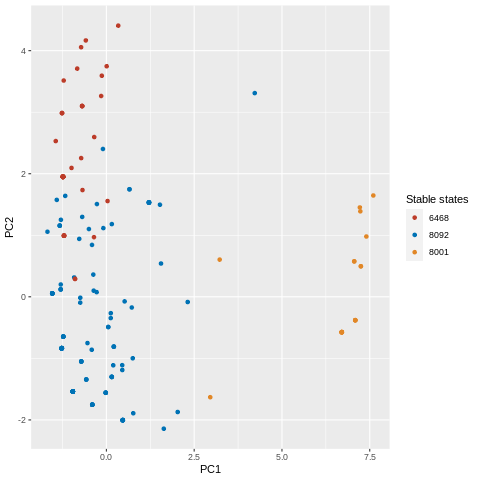

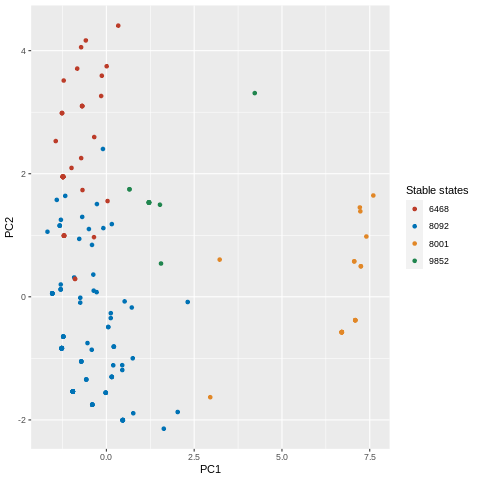

In [ ]:
%%R
PCplot(ocvecs, sa, ssrep=ela[[2]])
PCplot(ocvecs, sa, ssrep=ela[[2]], pruned=FALSE)

Disconnectivity graph


[1] 46468 38092 58001
NULL


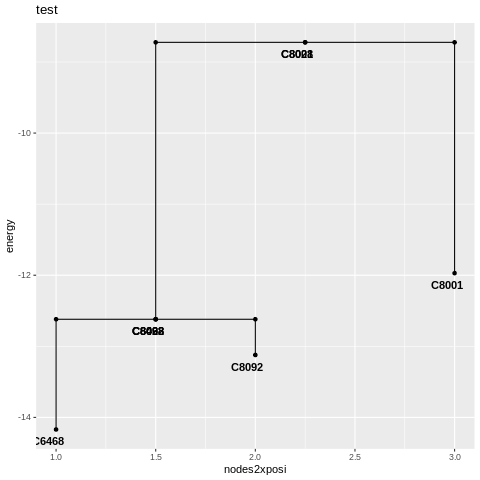

In [ ]:
%%R
showDG(ela[[1]], ocvecs, "test")

### Visualization of species' interaction

NULL


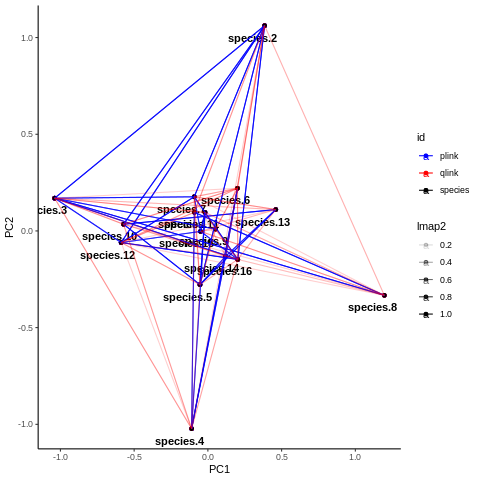

In [ ]:
%%R
showIntrGraph(ela[[1]], je, th=0.4, # <- Threshold for links to be displayed
              annot_adj=c(0.75, 2.00))

### Energy landscape analysis with environmental gradients

In [ ]:
# Parameter fitting including environmental parameters
%%R
sa <- runSA(data=as.matrix(ocvecs), env=as.matrix(envecs), qth=10^-5, rep=256, threads=1)

Start parameter fitting

Done ; elapsed time 53.03 sec



In [ ]:
%%R
colnames(envecs)

[1] "factor.1" "factor.2"


In [ ]:
%%R
gela <- GradELA(sa=sa, eid="factor.1", # Specify the label or position of an environmental factor
  env=envecs, refenv=NULL, steps=32, prn=0.05, threads=1) #[[1]]: return value of ELA function for each step, [[2]]: value of environmental factor for each step, [[3]]: specified environmental factor

refenv not specified, the mean of envecs is used
processing(32) |================================|
Elapsed time 27.38 sec


[1] 38092 58001 59852
NULL


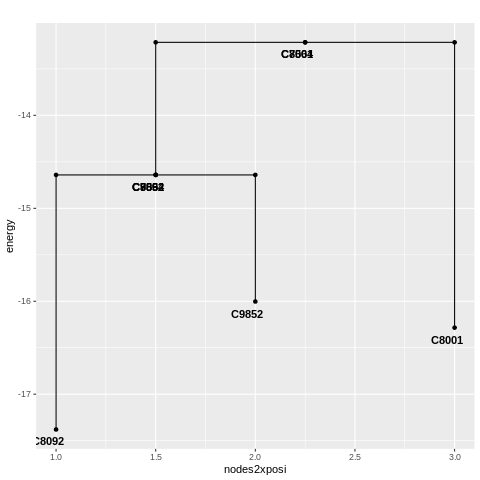

In [ ]:
# Disconnectivity graph
%%R
showDG(gela[[1]][[1]][[1]], ocvecs)

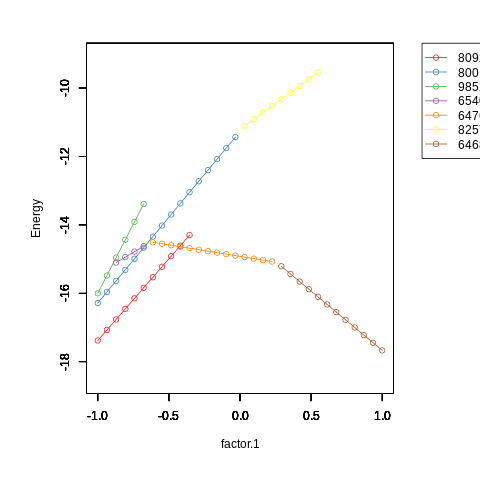

In [ ]:
# Stable state diagram
%%R
showSSD(gela)

In [ ]:
# SSentropy and energy gap
%%R
stability(sa, unique(ocvecs))

           energy.gap  ssentropy
sample.1    8.9677369 0.38067661
sample.10   0.9065189 0.20922048
sample.100 10.1842223 0.31945397
sample.101  0.9094741 0.00000000
sample.102  2.3682234 0.00000000
sample.103  4.0913503 0.00000000
sample.104  0.0000000 0.00000000
sample.105  7.8003026 0.70976455
sample.106  0.4967142 0.00000000
sample.107  1.0791330 0.00000000
sample.108  2.0339233 0.00000000
sample.11   6.1608068 0.00000000
sample.110  0.2147883 0.60481259
sample.114  6.9315881 0.00000000
sample.119  5.3357987 0.00000000
sample.12   5.0441691 0.08079314
sample.121  6.7585849 0.00000000
sample.123  2.5017834 0.25138814
sample.124  3.3838803 0.50591924
sample.125  5.1152068 0.00000000
sample.126 11.3894610 0.00000000
sample.129  6.0886620 0.00000000
sample.132  6.9609927 0.24685851
sample.138  5.7746618 0.00000000
sample.139  2.8193739 0.07408838
sample.140  1.6879735 0.00000000
sample.143  9.3466900 0.00000000
sample.150  7.1199801 0.71992358
sample.152  3.1918468 0.00000000
sample.153